In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
import itertools
import numpy as np

%load_ext autoreload
%autoreload 2

from results import load_results, general_stats, pretty_highest_ind
import plot

plt.rcParams['figure.figsize'] = (12, 6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Starting on a 2-hypergraph

In [16]:
h2_run_ids = ['aircraft_fuel_20210913']
h2_find2, h2_findq, ind_find2, ind_findq = load_results(h2_run_ids, return_inds=True)
findq_subset = [(0.05, 1.00, 0), (0.10, 1.00, 0), (0.05, 1.00, 1)]

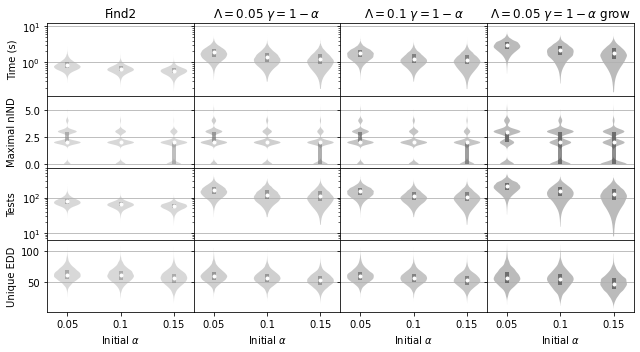

In [17]:
fig = plot.plot_comparison(h2_find2, h2_findq, findq_subset)

In [4]:
#fig.savefig('/home/aalvarez/Downloads/aircraft.pdf')

In [5]:
h2_stats = general_stats(h2_find2, h2_findq, findq_subset)
h2_stats

,Method,Lambda,Gamma,Time Q1,Time Q3,Match Q1,Match Q3,Card Q1,Card Q3,Precision,Overhead,N
0,Find2,NaN,NaN,0.570546,0.779681,0.078431,0.113636,54.0,68.0,0.962225,1.076433,8000
1,FindQ 0,0.05,0.9,1.023320,1.850298,0.088889,0.128205,50.0,64.0,0.553975,2.262152,8000
2,FindQ 0,0.10,0.9,0.967346,1.659522,0.088889,0.125000,50.0,63.0,0.595697,2.032503,8000
3,FindQ 1,0.05,0.9,1.583681,2.781971,0.090909,0.133333,45.0,64.0,0.449202,2.862616,8000


In [6]:
files = [
    'Scenario_Normal.csv',
    'Scenario_One.csv',
    'Scenario_Two.csv',
    'Scenario_Three.csv',
    'Scenario_Four.csv'
]
initial_alpha = 0.10

In [7]:
sm = cm.ScalarMappable(cmap='Dark2', norm=plt.Normalize(vmin=0, vmax=len(findq_subset) + 1))

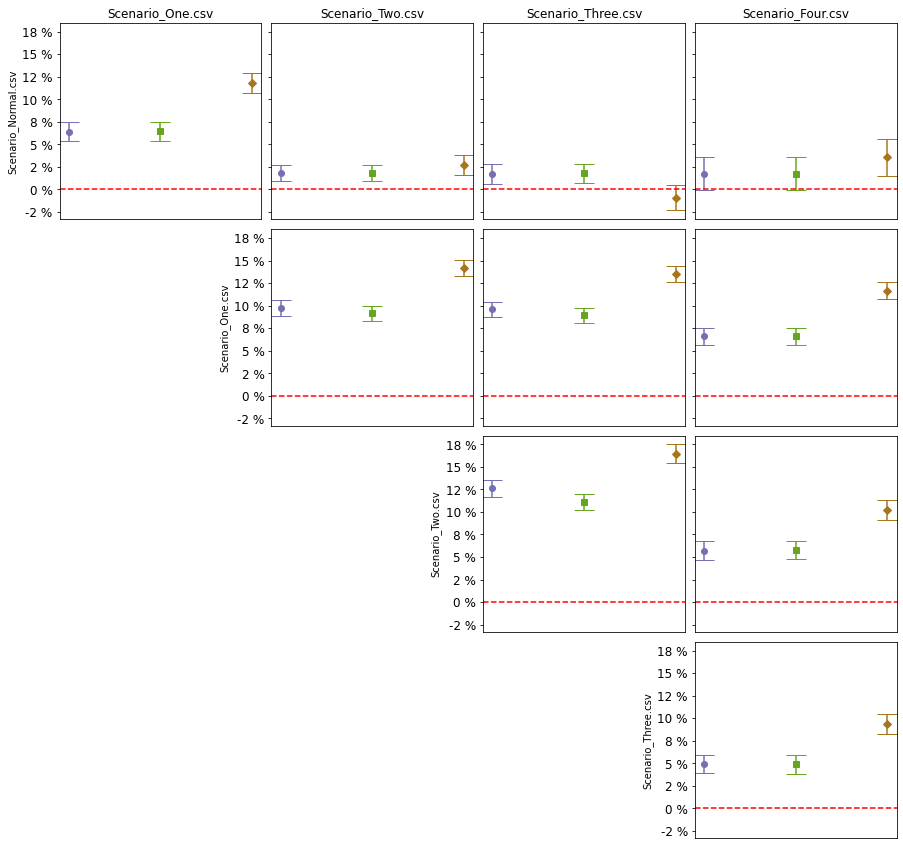

In [23]:
f2mask = h2_find2['bootstrap_alpha'] == initial_alpha
f2 = h2_find2[f2mask]

fig = plt.figure(figsize=(15, 15))
grid = gridspec.GridSpec(nrows=len(files)-1, ncols=len(files)-1, hspace=0.05, wspace=0.05)

ax = None
for i, fa in enumerate(files):
    for j, fb in enumerate(files[i+1:], start=i):
        ax = fig.add_subplot(grid[i, j], sharey=ax)
        if i == 0:
            ax.set_title(fb)
        if j == i:
            ax.set_ylabel(fa)
        else:
            plt.setp(ax.get_yticklabels(), visible=False)
            
        column = f'max_{fa}_{fb}'
        if column not in f2:
            column = f'max_{fb}_{fa}'
        ref_ind = f2[column]
        
        fqmask = dict()
        for k in findq_subset:
            fqmask[k] = h2_findq[k]['bootstrap_alpha'] == initial_alpha
        
        markers = itertools.cycle(['o', 's', 'D', '*'])
        for fqi, key in enumerate(findq_subset, start=1):
            marker = next(markers)
            fqdf = h2_findq[key][fqmask[key]]
            v = fqdf[column]
            label = plot.readable_key(*key)
            plot.plot_confidence(ax, fqi, v, sm, ref=ref_ind, label=label, marker=marker)

        ax.axhline(0, linestyle='--', c='red')

In [26]:
fig.savefig('/home/aalvarez/Downloads/bootstrap_aircraft.eps',bbox_inches='tight')

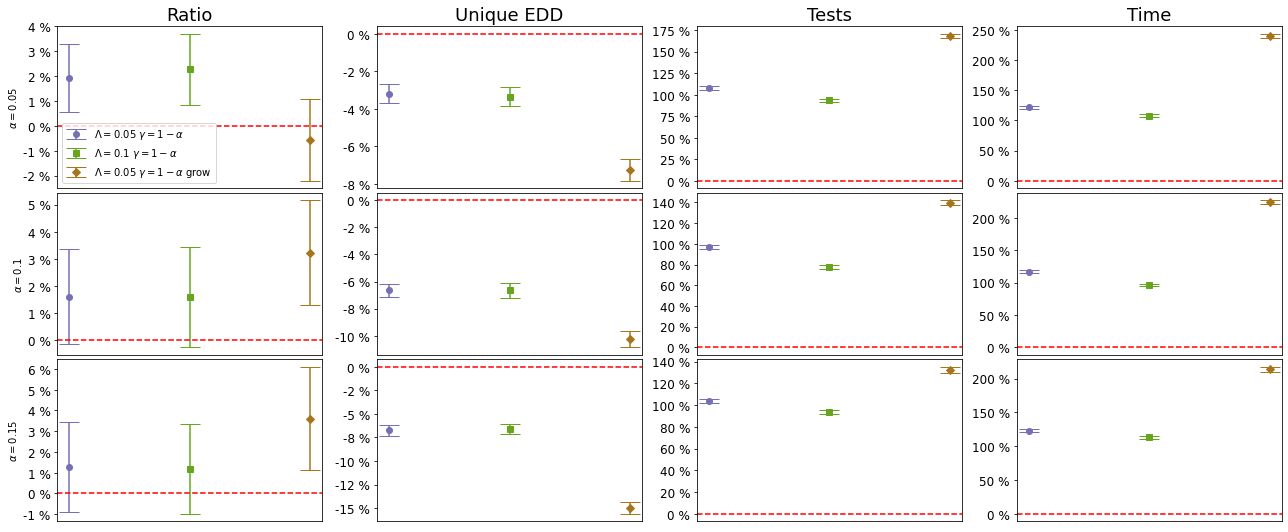

In [10]:
plot.bootstrap_plot(h2_find2, h2_findq, findq_subset)
plt.show()

In [87]:
pretty_highest_ind(ind_find2, topn=3)

[  Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6              FTV_S              FTF,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF              FTF
 5                FTL              FTL
 6              FTV_S            FTV_S,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF            CLV_S
 1              CLV_S              CLF
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6              FTV_S              FTF]

In [86]:
pretty_highest_ind(ind_findq[(0.05, 1., 0)], topn=3)

[  Scenario_Three.csv Scenario_Two.csv
 0                CLF            CLV_S
 1              CLV_S              CLF
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF              FTF
 5                FTL              FTL
 6                FTT              FTT
 7              FTV_S            FTV_S,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF              FTF
 5                FTL              FTL
 6                FTT              FTT
 7              FTV_S            FTV_S,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF            CLV_S
 1              CLV_S              CLF
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6                FTT  

In [76]:
pretty_highest_ind(ind_findq[(0.1, 1., 1)], topn=3)

[  Scenario_Three.csv Scenario_Two.csv
 0                CLF            CLV_S
 1              CLV_S              CLF
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6                FTT              FTT
 7              FTV_S              FTF,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6                FTT              FTT
 7              FTV_S              FTF,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF              FTF
 5                FTL              FTL
 6                FTT  